In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import History
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from keras.applications.resnet import ResNet50 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import warnings
warnings.filterwarnings("ignore")



In [ ]:
def data_prep(parasitized,uninfected):

    parasitized= ["../input/cell-images-for-detecting-malaria/cell_images/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["../input/cell-images-for-detecting-malaria/cell_images/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'), os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'))
df.head()

,Image_Path,Labels
0,../input/cell-images-for-detecting-malaria/cel...,parasitized
1,../input/cell-images-for-detecting-malaria/cel...,parasitized
2,../input/cell-images-for-detecting-malaria/cel...,parasitized
3,../input/cell-images-for-detecting-malaria/cel...,parasitized
4,../input/cell-images-for-detecting-malaria/cel...,parasitized


In [ ]:

train, test = train_test_split(df, test_size = .20)

img_datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest', validation_split=0.2)
                               

In [ ]:
def plot_loss_and_accuracy(mo_fit):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/30
100/100 [==============================] - 44s 208ms/step - loss: 0.7802 - accuracy: 0.7650 - val_loss: 0.4723 - val_accuracy: 0.7910
Epoch 2/30
100/100 [==============================] - 15s 148ms/step - loss: 0.2937 - accuracy: 0.8870 - val_loss: 0.2955 - val_accuracy: 0.9180
Epoch 3/30
100/100 [==============================] - 13s 129ms/step - loss: 0.3415 - accuracy: 0.8910 - val_loss: 0.2658 - val_accuracy: 0.9160
Epoch 4/30
100/100 [==============================] - 14s 141ms/step - loss: 0.3322 - accuracy: 0.8950 - val_loss: 0.1956 - val_accuracy: 0.9320
Epoch 5/30
100/100 [==============================] - 14s 141ms/step - loss: 0.1836 - accuracy: 0.9360 - val_loss: 0.1719 - val_accuracy: 0.9450
Epoch 6/30
100/100 [==============================] - 13s 134ms/step - loss: 0.1750 - a

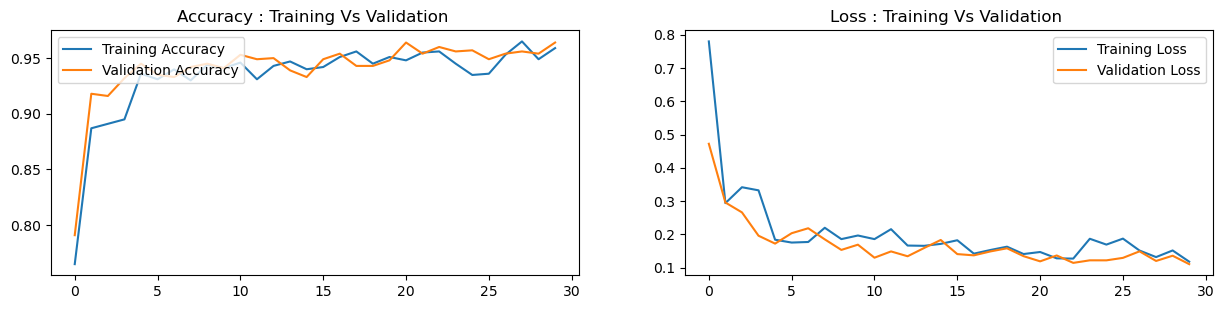

In [ ]:
def resnet_model(df, train, test):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    resnet_model=ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))
    model=Sequential()
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
    
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100,
    epochs = 30)
    
    
    return model_history
    
plot_loss_and_accuracy(resnet_model(df, train, test))

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 14s 118ms/step - loss: nan - accuracy: 0.5180 - val_loss: nan - val_accuracy: 0.4990
Epoch 2/30
100/100 [==============================] - 10s 104ms/step - loss: nan - accuracy: 0.5030 - val_loss: nan - val_accuracy: 0.4990
Epoch 3/30
100/100 [==============================] - 11s 108ms/step - loss: nan - accuracy: 0.4940 - val_loss: nan - val_accuracy: 0.4990
Epoch 4/30
100/100 [==============================] - 12s 120ms/step - loss: nan - accuracy: 0.5090 - val_loss: nan - val_accuracy: 0.4990
Epoch 5/30
100/100 [==============================] - 11s 111ms/step - loss: nan - accuracy: 0.5140 - val_loss: nan - val_accuracy: 0.4990
Epoch 6/30
100/100 [==============================] - 10s 104ms/step - loss: nan - accuracy: 0.4920 - val_loss: nan - val_accuracy: 0.4990
Epoch 7/30
100/100 [=======================

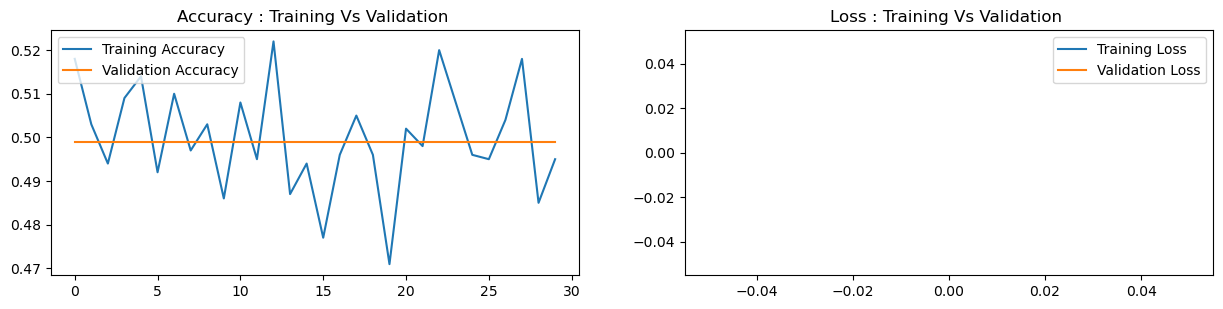

In [ ]:
def vgg19_model(df, train, test):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(96,96), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(96,96), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(96,96,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    
#     model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-2),loss='binary_crossentropy',metrics=['accuracy'])
    model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 30)
    
    return model_history
    
plot_loss_and_accuracy(vgg19_model(df, train, test))

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/30
100/100 [==============================] - 37s 194ms/step - loss: 0.6450 - accuracy: 0.6360 - val_loss: 0.4644 - val_accuracy: 0.7850
Epoch 2/30
100/100 [==============================] - 13s 128ms/step - loss: 0.4749 - accuracy: 0.7740 - val_loss: 0.3961 - val_accuracy: 0.8290
Epoch 3/30
100/100 [==============================] - 12s 122ms/step - loss: 0.3964 - accuracy: 0.8370 - val_loss: 0.3418 - val_accuracy: 0.8530
Epoch 4/30
100/100 [==============================] - 13s 135ms/step - loss: 0.2804 - accuracy: 0.8870 - val_loss: 0.3032 - val_accuracy: 0.8970
Epoch 5/30
100/100 [==============================] - 13s 128ms/step - loss: 0.3425 - accuracy: 0.8680 - val_loss: 0.2354 - val_accuracy: 0.9170
Epoch 6/30
100/100 [==============================] - 13s 134ms/step - loss: 0.3062 - a

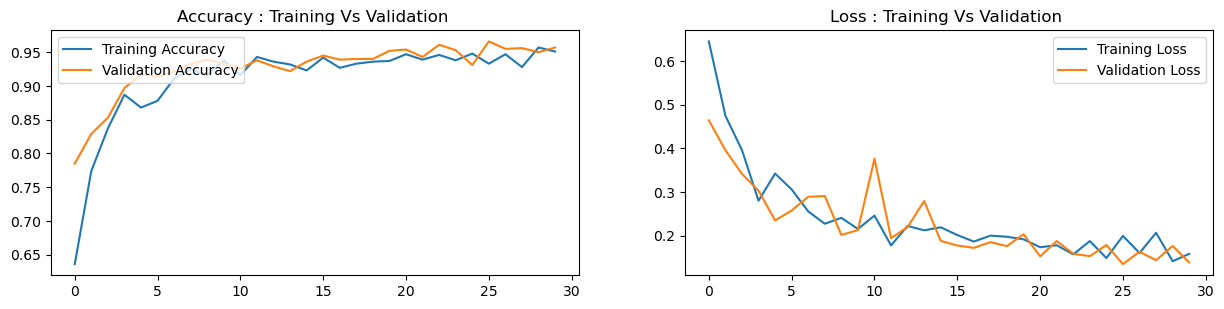

In [ ]:
def inception_v3_model(df, train, test):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(96, 96), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(96, 96), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    inception_model = InceptionV3(input_shape=(96, 96,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(inception_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#     keras.optimizers.RMSprop(lr=1e-4)
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 30)
    
    return model_history
    
plot_loss_and_accuracy(inception_v3_model(df, train, test))